In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To allow more flexible output. (see comments on Q4)
from IPython.display import display, Markdown, HTML

%matplotlib inline


# format for floats
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_gdp = pd.read_csv('data/gdp_per_capita.csv').set_index('Country Name')
df_gender = pd.read_csv('data/gender_equality.csv').set_index('Country Name')
df_happ = pd.read_csv('data/2020.csv').set_index('Country name')

In [3]:
# Gender Equality separated by GENDER INEQUALITY INDEX and GENDER DEVELOPMENT INDEX
df_gender_GII = df_gender[df_gender['Indicator Code'] == 'GE_GII']
df_gender_GDI = df_gender[df_gender['Indicator Code'] == 'GE_GDI']

In [4]:
#df_gdp.dtypes
df_gdp = df_gdp.drop(columns=['Unnamed: 65'])

## Gender Inequality Index Comparison by Country

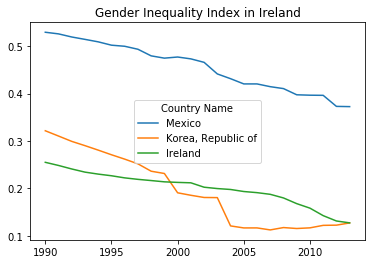

In [11]:
df_gender_GII_clean = df_gender_GII.T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country = df_gender_GII[(df_gender_GII.index == 'Ireland') | (df_gender_GII.index == 'Mexico') | (df_gender_GII.index == 'Korea, Republic of')].T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country.plot(title = 'Gender Inequality Index in Ireland')


## GDP per Capita and Gender Inequality Index in the United States

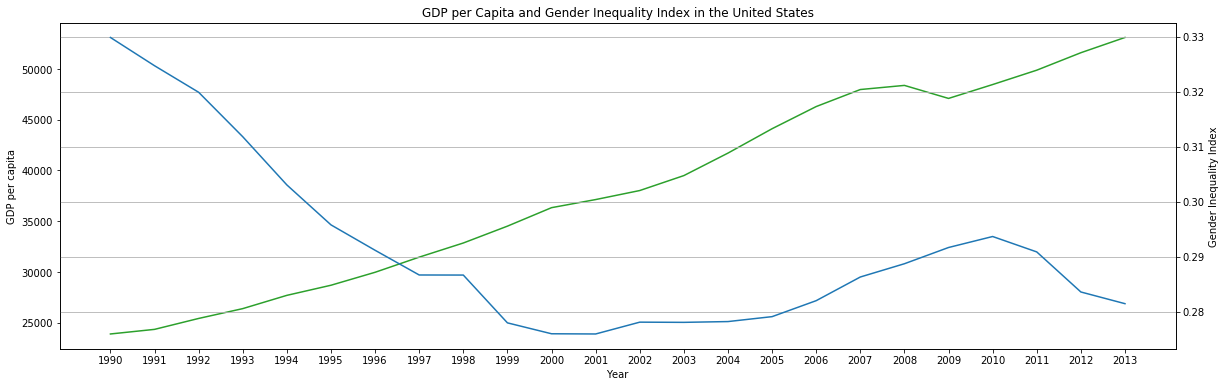

In [30]:
df_gdp_US = df_gdp[df_gdp.index == 'United States'].T.drop(index = ('Code'))
df_gdp_US = df_gdp_US.iloc[30:-7]

fig, ax1 = plt.subplots(figsize=(20, 6))

years = df_gender_GII_clean.index

ax1.set_xlabel('Year')
ax1.set_ylabel("GDP per capita", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(df_gdp_US.index, df_gdp_US['United States'], color='tab:green', label = 'GDP per capita')

ax2 = ax1.twinx()
ax2.plot(df_gender_GII_clean['United States'].index, df_gender_GII_clean['United States'], label = 'GII')
ax2.set_ylabel("Gender Inequality Index", color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.grid(True)
plt.title('GDP per Capita and Gender Inequality Index in the United States')
plt.show()

## Happiness x GDP

In [3]:
#preprocessing

df_happ_renamed = df_happ.rename(columns={"Country name": "Country Name"})
display(df_happ_renamed.head())
df = pd.merge(df_happ_renamed, df_gdp, left_index=True, right_index=True, how='inner')
display(df)

NameError: name 'df_happ' is not defined

In [ ]:
p = sns.scatterplot(data = df, x = "2020", y = "Ladder score")
p.set_xlabel("GDP per capita")
p.set_ylabel("Subjective Happiness Score")
p.set_title("Correlation between Happiness and Economy in 2020")

In [ ]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

In [ ]:
df['2020'].plot(kind='hist')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
# log scale transformation of GDP-ppp-per-capita
df[['2020', "2019"]] = pt.fit_transform(df[['2020', "2019"]])

In [ ]:
df['2020'].plot(kind='hist')

In [ ]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

In [ ]:
p = sns.scatterplot(data = df, x = "2020", y = "Ladder score")
p.set_xlabel("Normalized GDP per capita")
p.set_ylabel("Subjective Happiness Score")
p.set_title("Correlation between Happiness and Economy in 2020")